In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
cars = sns.load_dataset('mpg')

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
cars.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [6]:
cars.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [7]:
cars.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [8]:
cars = cars[cars.cylinders.isin([8, 6, 4])]

In [9]:
hp = cars.horsepower
mpg = cars.mpg
cyl = cars.cylinders
org = cars.origin

# cars.model_year.describe()
cars['newer'] = cars.model_year>75
newer = cars.newer

In [10]:
color = sns.color_palette('Paired')
color

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [11]:
# sns.set_style('darkgrid')
sns.set_style('whitegrid')

## Distplot

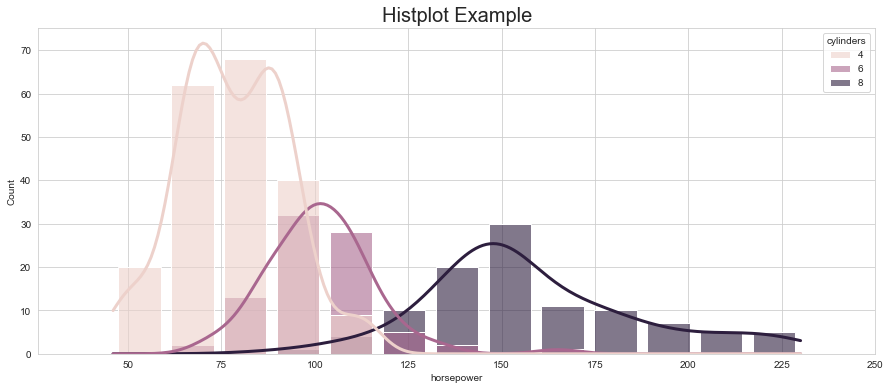

In [12]:
plt.figure(figsize=(15,6))

# sns.displot(kind="hist") == sns.histplot

p = sns.histplot(x=hp,
             
             # y=mpg,
             # cbar=True, cbar_kws=dict(shrink=.9),  # show values correlated with colors
             
             hue=cyl,
             legend=True,  # hue legend
             
             # stat='density','count', 'percent', # y axis
             # log_scale=True,
             
             # element='poly','step', 'bars'
             # fill=False 
             # discrete=True, #  (True, True) for x and y,  # for discrete integer data
             # multiple='stack', 'dodge', 'layer', 'fll',  # what to do with multiple values in the same bin

             alpha=0.6,
             shrink=.8,
             
             # bins=10, 
             # binwidth=10,
            
             kde=True, line_kws=dict(linewidth=3), kde_kws=dict(bw_adjust= 1),
             
             # cumulative=True,  # cumulate values as bins increase
             
            )

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})   
plt.xlim(hp.min()-20, hp.max()+20)
p.set_title("Histplot Example")
plt.yticklabels=[]
# plt.tight_layout()

## Kde plot

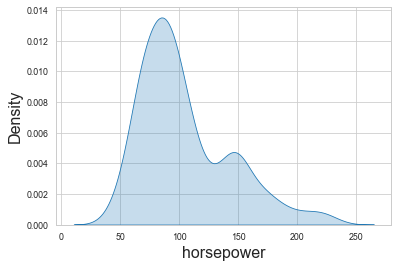

In [13]:
sns.kdeplot(x=hp,
            shade=True,
            bw_adjust=1,  # increasing variance, bigger value = smoother curves
            #cumulative=True,  # use cumulative function
           )

plt.xlim(hp.min()-50, hp.max()+50)
plt.yticklabels=[]

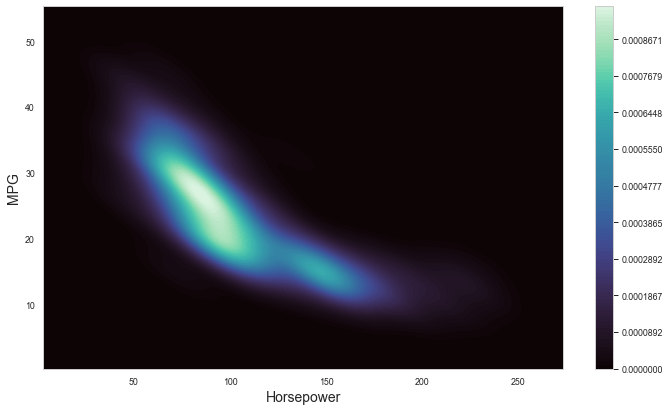

In [14]:
plt.figure(figsize=(10,6))

# combine two plots to see samples
# sns.scatterplot(x=hp, y=mpg, color='white', alpha=1, s=10, zorder=2)

sns.kdeplot(x=hp, y=mpg,
            
            levels=100,  # no lines
            
            fill=True,  # fill space between lines
            thresh=0.00, #0.05  # treshold for filling the space 0.00 fills all space
            
            cbar=True,
            cmap='mako'
           )

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout()

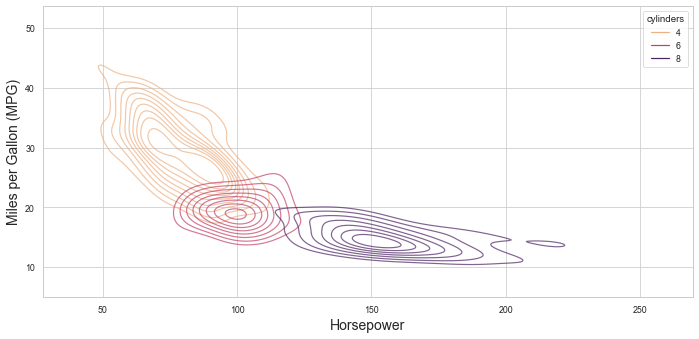

In [15]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=hp, y=mpg, 
            hue=cyl,
            # fill=True,
            thresh=0.2, 
            alpha=0.7,
            # cbar=True,
            palette='flare',
           )

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)
plt.tight_layout()

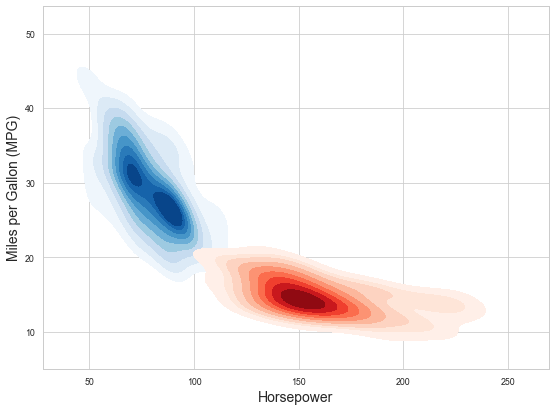

In [16]:
cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(x=cyl_4.horsepower, y=cyl_4.mpg,
            cmap='Blues', shade=True, thresh=0.1)
sns.kdeplot(x=cyl_8.horsepower, y=cyl_8.mpg,
            cmap='Reds', shade=True, thresh=0.1)

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)
plt.tight_layout()

## Boxplot

In [17]:
cars.mpg.describe()

count    391.000000
mean      23.515345
std        7.847549
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [ ]:
plt.figure(figsize=(15,6))
# sns.swarmplot(x=org, y=mpg, color=".25", order=['europe', 'usa', 'japan'])

p = sns.boxplot(
                x=org, y=mpg, 
                # x=mpg,
                hue=newer, # cyl,
                # dodge=False,  # when using hue, shift boxes so they are not on top of each other

                order=['europe', 'usa', 'japan'], 
                # hue_order=['False', 'True']  # list of string
    
                # width=0.5,  # box size
                linewidth=3,  # box line width
                # whis=1,  # interquartile range multiplier
    
                fliersize=10,  # outlier mark size
                # palette=,
               )



sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})   
p.set_title("Boxplot Example")
plt.tight_layout()

## Violin plot

In [ ]:
plt.figure(figsize=(15,5))
sns.swarmplot(x=org, y=mpg, color=".25", size=3, hue=cyl, dodge=True)

sns.violinplot(x=org, y=mpg,
               hue=cyl,
               
               # bw=0.5,  # variance
               inner=None#'stick' #'quartiles', 'box', 'point', 'stick'  # show inside figure
               
               # scale='width', # 'count', 'area',
               # linewidth=2,
               # scale_hue=False,
               
               # split=True,  # split requires exactly 2 hue values
               # x='origin', y='mpg', hue='cylinders',
               # data=cars[cars.cylinders.isin([4, 6])],
              )

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})   
p.set_title("Violinplot Example")
plt.tight_layout()

## Swarmplot & Stripplot

Swarmplot ans stripplot are very similar. In swarmplot, dots that are in the same place, are equally aligned with each other. In stripplot, a random noise is added to them.

All markers: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers

In [ ]:
plt.figure(figsize=(10,5))

#sns.stripplot
sns.swarmplot(x=org, y=hp, 
              hue=cyl,
              # orient='h',
              dodge=True,  # split swarms on hue
              # color='white',
              alpha=1,
              size=5,
              linewidth=0.1,  # edge width
              edgecolor='black',  # edge color
              # marker='*',
              );

## Scatterplot

In [ ]:
plt.figure(figsize=(10,5))

#sns.stripplot
sns.scatterplot(x=mpg, y=hp, 
                hue=cars.model_year,
                # hue_norm=(0, 7),  # range of hue color
                
                size=cars.model_year,  # size of dots changing with variable
                sizes=(50, 100),  # range of size
                # size_order=,
                s=100,  # size of points if size is not changing with varaible
                
                style=cyl,  # dot style should change with variable
                # markers={} # style markers linked to variable values
                
                alpha=1,
                linewidth=0.3,  # edge width
                edgecolor='black',  # edge color
                
                legend='brief',# 'full',
                
                # zorder=2  # works like z-index from css if plotting two or more graphs 
                )

## Lineplot

## Pairplots

In [ ]:
sns.pairplot(cars, 
             hue='cylinders', 
             vars=['mpg', 'horsepower', 'acceleration'], 
             palette='flare'
            );